#### Importing the Libraries

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Importing and Understanding the Dataset

In [100]:
FraudDataset = pd.read_csv('FraudData.csv')

Shape of our dataset

In [101]:
FraudDataset.shape

(594643, 10)

We are dealing with around 600k rows and 10 columns

Let's have a quick overview on the data

In [102]:
FraudDataset.head(5)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


We can see that some columns require some data cleaning 

In [103]:
for col in FraudDataset.select_dtypes(include='object'):
    FraudDataset[col] = FraudDataset[col].str.strip().str.strip("'").str.strip('"')

In [104]:
FraudDataset.head(5)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,C1093826151,4,M,28007,M348934600,28007,es_transportation,4.55,0
1,0,C352968107,2,M,28007,M348934600,28007,es_transportation,39.68,0
2,0,C2054744914,4,F,28007,M1823072687,28007,es_transportation,26.89,0
3,0,C1760612790,3,M,28007,M348934600,28007,es_transportation,17.25,0
4,0,C757503768,5,M,28007,M348934600,28007,es_transportation,35.72,0


In [105]:
FraudDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [106]:
FraudDataset.isnull().sum().sum()

np.int64(0)

As we can see we have no missing values

Let's analyze our columns to understand which type of Machine Learning System we are dealing with


In [107]:
FraudDataset.columns

Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud'],
      dtype='object')

In [108]:
FraudDataset['fraud'].unique()

array([0, 1])

We can understand that we are dealing with a Classification problem with 0 as non fraud (genuine transactions) and 1 as fraud (fraudulant transactions) 

            count  percent
fraud                     
Not Fraud  587443    98.79
Fraud        7200     1.21


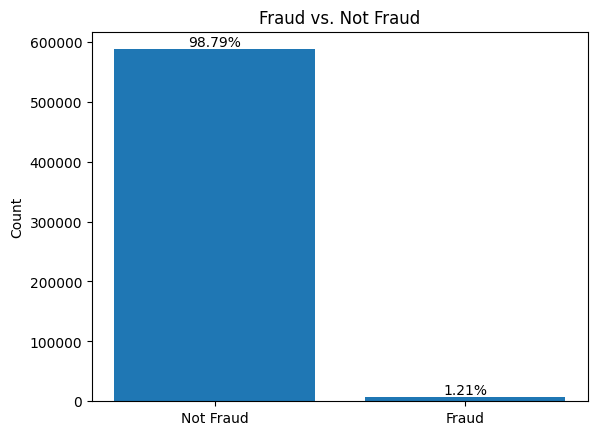

In [109]:
# 1) Counts and percentages
counts = FraudDataset['fraud'].value_counts().sort_index()               # 0 then 1
pcts   = FraudDataset['fraud'].value_counts(normalize=True).sort_index() * 100

summary = pd.DataFrame({
    'count': counts,
    'percent': pcts.round(2)
})

# Optional: make the index human-friendly
summary.index = summary.index.map({0: 'Not Fraud', 1: 'Fraud'})

print(summary)

# 2) Plot (counts with percent labels)
fig, ax = plt.subplots()
bars = ax.bar(summary.index, summary['count'])
ax.set_title('Fraud vs. Not Fraud')
ax.set_ylabel('Count')

# Annotate bars with percentages
for rect, pct in zip(bars, summary['percent']):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        height,
        f'{pct:.2f}%',
        ha='center',
        va='bottom'
    )

plt.show()

We can clearly see an imbalance in our target column  98.79% labled as 0 and 1.21% labeled as 1.
This is very common when we deal with Fraud Data, later we will have to fix this issue with SMOTE , undersampling or oversampling. 

Let's analyse the features

In [110]:
FraudDataset['step'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179])

In [111]:
FraudDataset['customer'].unique()

array(['C1093826151', 'C352968107', 'C2054744914', ..., 'C1014783484',
       'C849065220', 'C1809646275'], shape=(4112,), dtype=object)

In [112]:
FraudDataset['age'].unique()

array(['4', '2', '3', '5', '1', '6', 'U', '0'], dtype=object)

In [113]:
FraudDataset['gender'].unique()

array(['M', 'F', 'E', 'U'], dtype=object)

In [114]:
FraudDataset['zipcodeOri'].unique()

array(['28007'], dtype=object)

In [115]:
FraudDataset['merchant'].unique()

array(['M348934600', 'M1823072687', 'M50039827', 'M1888755466',
       'M1053599405', 'M85975013', 'M480139044', 'M692898500',
       'M348875670', 'M151143676', 'M840466850', 'M1741626453',
       'M1535107174', 'M855959430', 'M349281107', 'M209847108',
       'M2122776122', 'M1873032707', 'M2011752106', 'M857378720',
       'M1198415165', 'M1748431652', 'M980657600', 'M1352454843',
       'M117188757', 'M547558035', 'M17379832', 'M1649169323',
       'M1946091778', 'M97925176', 'M923029380', 'M1353266412',
       'M1842530320', 'M677738360', 'M1313686961', 'M732195782',
       'M1600850729', 'M1872033263', 'M3697346', 'M495352832',
       'M1400236507', 'M1294758098', 'M1913465890', 'M45060432',
       'M78078399', 'M2080407379', 'M1788569036', 'M1416436880',
       'M933210764', 'M1726401631'], dtype=object)

In [116]:
FraudDataset['zipMerchant'].unique()

array(['28007'], dtype=object)

In [117]:
FraudDataset['category'].unique()

array(['es_transportation', 'es_health', 'es_otherservices', 'es_food',
       'es_hotelservices', 'es_barsandrestaurants', 'es_tech',
       'es_sportsandtoys', 'es_wellnessandbeauty', 'es_hyper',
       'es_fashion', 'es_home', 'es_contents', 'es_travel', 'es_leisure'],
      dtype=object)

In [118]:
FraudDataset['amount'].unique()

array([  4.55,  39.68,  26.89, ..., 249.18, 224.81, 190.31],
      shape=(23767,))

In [119]:
FraudDataset.describe()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


Visualize Data to get more insights

  age     fraud
0   0  0.019576
1   1  0.011853
2   2  0.012514
3   3  0.011928
4   4  0.012933
5   5  0.010951
6   6  0.009748
7   U  0.005942


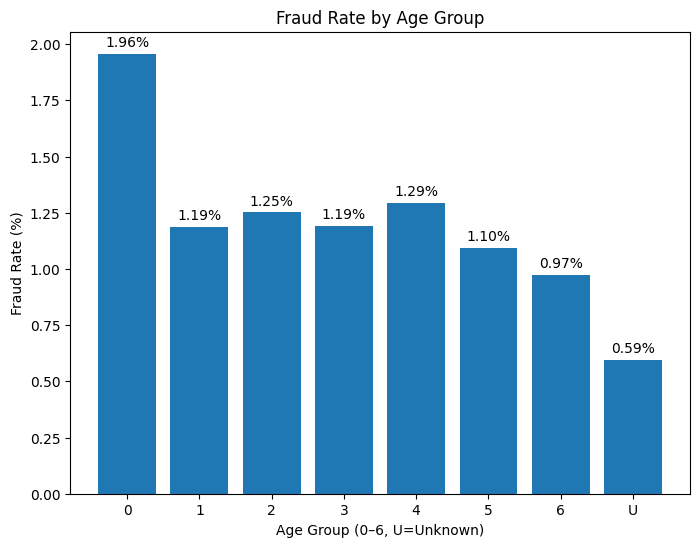

In [121]:
# Group by age and calculate fraud rate
fraud_rate_by_age = (
    FraudDataset.groupby("age")["fraud"]
    .mean()                # mean of 0/1 = fraud rate
    .reset_index()
    .sort_values("age")
)

print(fraud_rate_by_age)

# Plot
plt.figure(figsize=(8,6))
plt.bar(fraud_rate_by_age["age"], fraud_rate_by_age["fraud"]*100)

plt.title("Fraud Rate by Age Group")
plt.xlabel("Age Group (0–6, U=Unknown)")
plt.ylabel("Fraud Rate (%)")

# Annotate bars with percentages
for i, v in enumerate(fraud_rate_by_age["fraud"]*100):
    plt.text(i, v + 0.02, f"{v:.2f}%", ha='center', va='bottom')

plt.show()

  gender     fraud
1      F  0.014660
2      M  0.009073
0      E  0.005942
3      U  0.000000


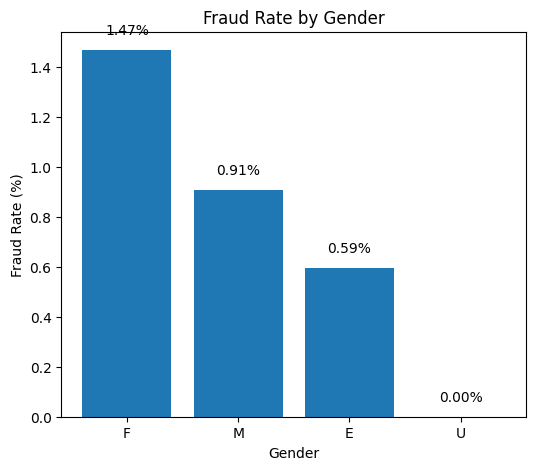

In [122]:
# Group by gender and calculate fraud rate
fraud_rate_by_gender = (
    FraudDataset.groupby("gender")["fraud"]
    .mean()                # mean of 0/1 = fraud rate
    .reset_index()
    .sort_values("fraud", ascending=False)
)

print(fraud_rate_by_gender)

# Plot
plt.figure(figsize=(6,5))
plt.bar(fraud_rate_by_gender["gender"], fraud_rate_by_gender["fraud"]*100)

plt.title("Fraud Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Fraud Rate (%)")

# Annotate bars with percentages
for i, v in enumerate(fraud_rate_by_gender["fraud"]*100):
    plt.text(i, v + 0.05, f"{v:.2f}%", ha='center', va='bottom')

plt.show()

                 category     fraud
8              es_leisure  0.949900
13              es_travel  0.793956
10       es_sportsandtoys  0.495252
6        es_hotelservices  0.314220
9        es_otherservices  0.250000
5                 es_home  0.152064
4               es_health  0.105126
11                es_tech  0.066667
14   es_wellnessandbeauty  0.047594
7                es_hyper  0.045917
0   es_barsandrestaurants  0.018829
2              es_fashion  0.017973
1             es_contents  0.000000
3                 es_food  0.000000
12      es_transportation  0.000000


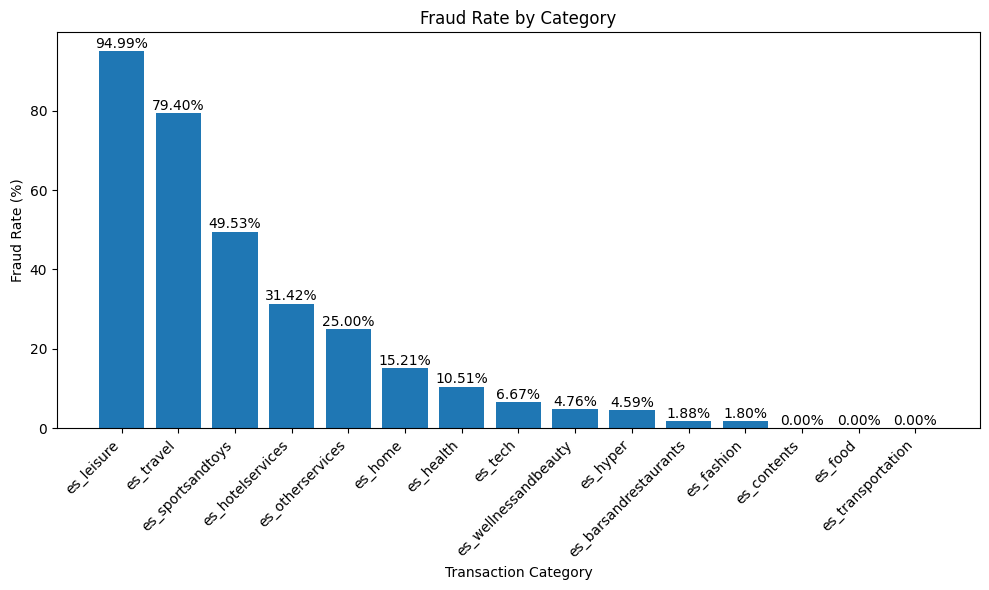

In [123]:
# Group by category and calculate fraud rate
fraud_rate_by_cat = (
    FraudDataset.groupby("category")["fraud"]
    .mean()                # mean of 0/1 = fraud rate
    .reset_index()
    .sort_values("fraud", ascending=False)
)

print(fraud_rate_by_cat)

# Plot
plt.figure(figsize=(10,6))
plt.bar(fraud_rate_by_cat["category"], fraud_rate_by_cat["fraud"]*100)

plt.title("Fraud Rate by Category")
plt.xlabel("Transaction Category")
plt.ylabel("Fraud Rate (%)")
plt.xticks(rotation=45, ha='right')

# Annotate bars with percentages
for i, v in enumerate(fraud_rate_by_cat["fraud"]*100):
    plt.text(i, v + 0.05, f"{v:.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

Fraudulent transactions are disproportionately concentrated among the youngest segment (≤18 years). This indicates that younger customers are either more frequently targeted or potentially more vulnerable to fraud attempts.

Fraud incidents appear more frequent among female customers compared to other gender groups. While gender alone is not a strong standalone predictor, this highlights possible behavioral or exposure differences worth monitoring.

The top three categories most affected by fraud are Leisure, Travel, and Sports & Toys. These categories typically involve discretionary spending and, in some cases (e.g., travel), higher-value transactions, making them more attractive targets for fraudsters. 

In [124]:
corr_matrix = FraudDataset.corr(numeric_only = True)
corr_matrix['fraud'].sort_values(ascending=False)

fraud     1.000000
amount    0.489967
step     -0.011898
Name: fraud, dtype: float64

Let's create new relevant features if possible, such as the time of day from the 'step' column

In [125]:
if 'step' in FraudDataset.columns:
   FraudDataset['step'] = pd.to_numeric(FraudDataset['step'], errors='coerce')
   FraudDataset['hour_of_day'] = (FraudDataset['step'] % 24).astype('int8')
   FraudDataset['day_of_week'] = ((FraudDataset['step'] // 24) % 7).astype('int8')

In [126]:
corr_matrix = FraudDataset.corr(numeric_only = True)
corr_matrix['fraud'].sort_values(ascending=False)

fraud          1.000000
amount         0.489967
hour_of_day   -0.000868
day_of_week   -0.008862
step          -0.011898
Name: fraud, dtype: float64

# Model Selection

In [532]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score

### Feature Engineering

In [173]:
FraudDataset.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,hour_of_day,day_of_week
0,0,C1093826151,4,M,28007,M348934600,28007,es_transportation,4.55,0,0,0
1,0,C352968107,2,M,28007,M348934600,28007,es_transportation,39.68,0,0,0
2,0,C2054744914,4,F,28007,M1823072687,28007,es_transportation,26.89,0,0,0
3,0,C1760612790,3,M,28007,M348934600,28007,es_transportation,17.25,0,0,0
4,0,C757503768,5,M,28007,M348934600,28007,es_transportation,35.72,0,0,0


In [176]:
FraudDataset_model = FraudDataset.drop(["customer", "zipcodeOri", "zipMerchant"], axis = 1)

In [177]:
FraudDataset_model.head()

,step,age,gender,merchant,category,amount,fraud,hour_of_day,day_of_week
0,0,4,M,M348934600,es_transportation,4.55,0,0,0
1,0,2,M,M348934600,es_transportation,39.68,0,0,0
2,0,4,F,M1823072687,es_transportation,26.89,0,0,0
3,0,3,M,M348934600,es_transportation,17.25,0,0,0
4,0,5,M,M348934600,es_transportation,35.72,0,0,0


In [185]:
categorical_features = ["age", "gender", "merchant", "category"]
numerical_features = ["step", "amount", "hour_of_day", "day_of_week"]

In [186]:
y = FraudDataset_model["fraud"]
X = FraudDataset_model.drop("fraud", axis= 1)

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [224]:
from sklearn.metrics import ConfusionMatrixDisplay

### *Logisitic Regression*

#### No Balancing

In [318]:
LR_NB_preprocessor = ColumnTransformer(
    transformers= [
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop= "first"), categorical_features)
    ],
    remainder= "drop"
)

In [319]:
LR_NB_pipeline = Pipeline(
    [
        ("prep", LR_NB_preprocessor),
        ("clf", LogisticRegression(random_state= 42))
    ]
)

In [320]:
LR_NB_cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state=42)

In [321]:
LR_NB_scores_auc = cross_val_score(LR_NB_pipeline, X_train, y_train, cv=LR_NB_cv, scoring="roc_auc", n_jobs=-1)
LR_NB_scores_ap  = cross_val_score(LR_NB_pipeline, X_train, y_train, cv=LR_NB_cv, scoring="average_precision", n_jobs=-1)


In [322]:
print("Mean ROC-AUC:", LR_NB_scores_auc.mean())
print("Mean PR-AUC:", LR_NB_scores_ap.mean())

Mean ROC-AUC: 0.997196028729214
Mean PR-AUC: 0.8800909117966708


In [323]:
LR_NB_pipeline.fit(X_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [324]:
LR_NB_y_pred = LR_NB_pipeline.predict(X_test)

In [325]:
print(classification_report(y_test, LR_NB_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117489
           1       0.87      0.71      0.78      1440

    accuracy                           1.00    118929
   macro avg       0.94      0.85      0.89    118929
weighted avg       0.99      1.00      0.99    118929



In [326]:
confusion_matrix(y_test, LR_NB_y_pred)

array([[117343,    146],
       [   422,   1018]])

Text(0.5, 1.0, 'Logisitic Regression | Confusion Matrix - No Balancing')

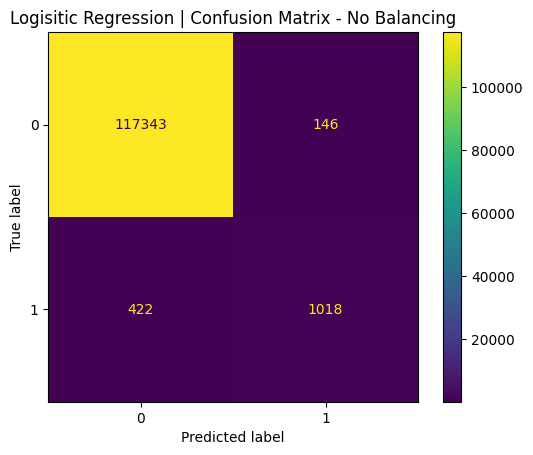

In [327]:
ConfusionMatrixDisplay.from_predictions(y_test, LR_NB_y_pred)
plt.title("Logisitic Regression | Confusion Matrix - No Balancing")

In [534]:
LR_NB_y_proba = LR_NB_pipeline.predict_proba(X_test)[:, 1]
print("Logistic Regression - No Balance | Test ROC-AUC:", roc_auc_score(y_test, LR_NB_y_proba))
print("Logisitc Regression - No Balance | Test PR-AUC (Average Precision):", average_precision_score(y_test, LR_NB_y_proba))

Logistic Regression - No Balance | Test ROC-AUC: 0.9969914441162814
Logisitc Regression - No Balance | Test PR-AUC (Average Precision): 0.8787696595339295


#### Class Weight: Balance

In [329]:
LR_CWB_preprocessor = ColumnTransformer(
    transformers= [
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop= "first"), categorical_features)
    ],
    remainder= "drop"
)

In [330]:
LR_CWB_pipeline = Pipeline(
    [
        ("prep", LR_CWB_preprocessor),
        ("clf", LogisticRegression(class_weight="balanced", random_state= 42))
    ]
)

In [331]:
LR_CWB_cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

In [332]:
LR_CWB_scores_auc = cross_val_score(LR_CWB_pipeline, X_train, y_train, cv=LR_CWB_cv, scoring="roc_auc", n_jobs=-1)
LR_CWB_scores_ap  = cross_val_score(LR_CWB_pipeline, X_train, y_train, cv=LR_CWB_cv, scoring="average_precision", n_jobs=-1)


In [333]:
print("Mean ROC-AUC:", LR_CWB_scores_auc.mean())
print("Mean PR-AUC:", LR_CWB_scores_ap.mean())

Mean ROC-AUC: 0.9976322030801461
Mean PR-AUC: 0.8748582550433541


In [334]:
LR_CWB_pipeline.fit(X_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [335]:
LR_CWB_y_pred = LR_CWB_pipeline.predict(X_test)

In [336]:
print(classification_report(y_test, LR_CWB_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    117489
           1       0.27      0.98      0.43      1440

    accuracy                           0.97    118929
   macro avg       0.64      0.98      0.71    118929
weighted avg       0.99      0.97      0.98    118929



In [337]:
confusion_matrix(y_test, LR_CWB_y_pred)

array([[113726,   3763],
       [    25,   1415]])

Text(0.5, 1.0, 'Logisitic Regression | Confusion Matrix - With Class Weight Balanced')

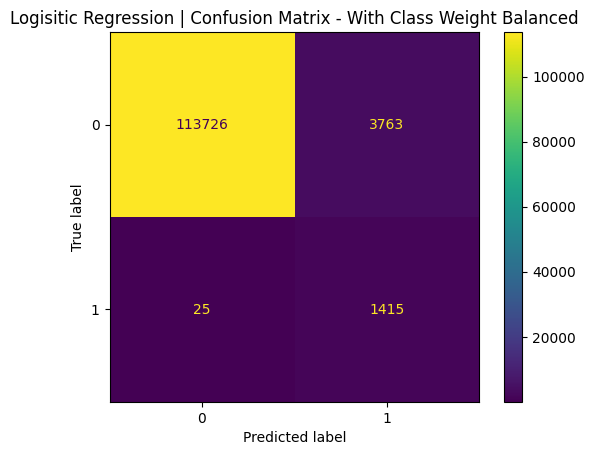

In [338]:
ConfusionMatrixDisplay.from_predictions(y_test, LR_CWB_y_pred)
plt.title("Logisitic Regression | Confusion Matrix - With Class Weight Balanced")

In [536]:
LR_CWB_y_proba = LR_CWB_pipeline.predict_proba(X_test)[:, 1]
print("Logisitc Regression - Class Weight Balanced | Test ROC-AUC:", roc_auc_score(y_test, LR_CWB_y_proba))
print("Logisitc Regression - Class Weight Balanced | Test PR-AUC (Average Precision):", average_precision_score(y_test, LR_CWB_y_proba))

Logisitc Regression - Class Weight Balanced | Test ROC-AUC: 0.9974397425858308
Logisitc Regression - Class Weight Balanced | Test PR-AUC (Average Precision): 0.8766279091400483


#### SMOTE

In [340]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [341]:
LR_SMT_preprocessor = ColumnTransformer(
    transformers= [
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop= "first"), categorical_features)
    ],
    remainder= "drop"
)

In [342]:
LR_SMT_pipeline = ImbPipeline(
    [
        ("prep", LR_SMT_preprocessor),
        ("smote", SMOTE()),
        ("clf", LogisticRegression(random_state= 42))
    ]
)

In [343]:
LR_SMT_cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

In [344]:
LR_SMT_scores_auc = cross_val_score(LR_SMT_pipeline, X_train, y_train, cv=LR_SMT_cv, scoring="roc_auc", n_jobs=-1)
LR_SMT_scores_ap  = cross_val_score(LR_SMT_pipeline, X_train, y_train, cv=LR_SMT_cv, scoring="average_precision", n_jobs=-1)

In [345]:
print("Mean ROC-AUC:", LR_SMT_scores_auc.mean())
print("Mean PR-AUC:", LR_SMT_scores_ap.mean())

Mean ROC-AUC: 0.9976274819511767
Mean PR-AUC: 0.8768604437261853


In [346]:
LR_SMT_pipeline.fit(X_train, y_train)

,steps,"[('prep', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [347]:
LR_SMT_y_pred = LR_SMT_pipeline.predict(X_test)

In [348]:
print(classification_report(y_test, LR_SMT_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    117489
           1       0.30      0.98      0.46      1440

    accuracy                           0.97    118929
   macro avg       0.65      0.97      0.72    118929
weighted avg       0.99      0.97      0.98    118929



In [349]:
confusion_matrix(y_test, LR_SMT_y_pred)

array([[114162,   3327],
       [    33,   1407]])

Text(0.5, 1.0, 'Logisitic Regression | Confusion Matrix - With SMOTE')

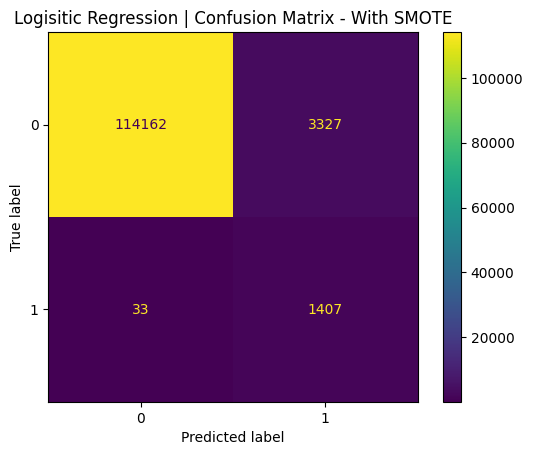

In [350]:
ConfusionMatrixDisplay.from_predictions(y_test, LR_SMT_y_pred)
plt.title("Logisitic Regression | Confusion Matrix - With SMOTE")

In [537]:
LR_SMT_y_proba = LR_SMT_pipeline.predict_proba(X_test)[:, 1]
print("Logisitc Regression - SMOTE | Test ROC-AUC:", roc_auc_score(y_test, LR_SMT_y_proba))
print("Logisitc Regression - SMOTE | Test PR-AUC (Average Precision):", average_precision_score(y_test, LR_SMT_y_proba))

Logisitc Regression - SMOTE | Test ROC-AUC: 0.9974220990901276
Logisitc Regression - SMOTE | Test PR-AUC (Average Precision): 0.87768607731157


#### Under-Sampling

In [352]:
from imblearn.under_sampling import RandomUnderSampler

In [353]:
LR_US_preprocessor = ColumnTransformer(
    transformers= [
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop= "first"), categorical_features)
    ],
    remainder= "drop"
)

In [354]:
LR_US_pipeline = ImbPipeline(
    [
        ("prep", LR_US_preprocessor),
        ("raus", RandomUnderSampler()),
        ("clf", LogisticRegression(random_state= 42))
    ]
)

In [355]:
LR_US_cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

In [356]:
LR_US_scores_auc = cross_val_score(LR_US_pipeline, X_train, y_train, cv=LR_US_cv, scoring="roc_auc", n_jobs=-1)
LR_US_scores_ap  = cross_val_score(LR_US_pipeline, X_train, y_train, cv=LR_US_cv, scoring="average_precision", n_jobs=-1)

In [362]:
print("Mean ROC-AUC:", LR_US_scores_auc.mean())
print("Mean PR-AUC:", LR_US_scores_ap.mean())

Mean ROC-AUC: 0.9973307347138484
Mean PR-AUC: 0.8668365601062458


In [357]:
LR_US_pipeline.fit(X_train, y_train)

,steps,"[('prep', ...), ('raus', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [358]:
LR_US_y_pred = LR_US_pipeline.predict(X_test)

In [359]:
print(classification_report(y_test, LR_US_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    117489
           1       0.26      0.98      0.41      1440

    accuracy                           0.97    118929
   macro avg       0.63      0.97      0.70    118929
weighted avg       0.99      0.97      0.98    118929



In [360]:
confusion_matrix(y_test, LR_US_y_pred)

array([[113460,   4029],
       [    26,   1414]])

Text(0.5, 1.0, 'Logisitic Regression | Confusion Matrix - With Under-Sampling')

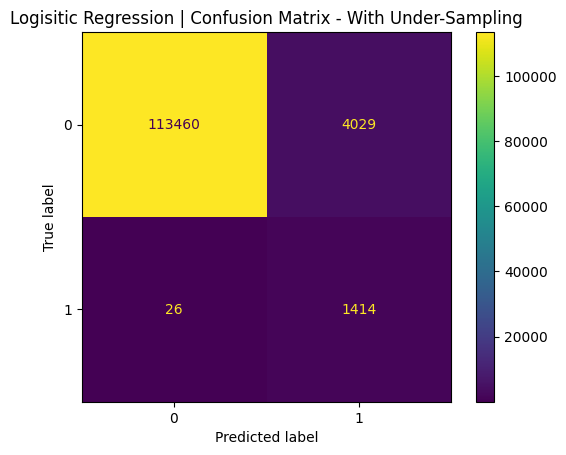

In [361]:
ConfusionMatrixDisplay.from_predictions(y_test, LR_US_y_pred)
plt.title("Logisitic Regression | Confusion Matrix - With Under-Sampling")

In [538]:
LR_US_y_proba = LR_US_pipeline.predict_proba(X_test)[:, 1]
print("Logisitc Regression - Under-Sampling | Test ROC-AUC:", roc_auc_score(y_test, LR_US_y_proba))
print("Logisitc Regression - Under-Sampling | Test PR-AUC (Average Precision):", average_precision_score(y_test, LR_US_y_proba))

Logisitc Regression - Under-Sampling | Test ROC-AUC: 0.9970968913401822
Logisitc Regression - Under-Sampling | Test PR-AUC (Average Precision): 0.865379763616269


### *Decision Tree*

In [364]:
from sklearn.tree import DecisionTreeClassifier

#### No Balancing

In [365]:
DT_NB_preprocessor = ColumnTransformer(
    transformers= [
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop= "first"), categorical_features)
    ],
    remainder= "drop"
)

In [366]:
DT_NB_pipeline = Pipeline(
    [
        ("prep", DT_NB_preprocessor),
        ("clf", (DecisionTreeClassifier(random_state= 42)))
    ]
)

In [367]:
DT_NB_cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state=42)

In [368]:
DT_NB_scores_auc = cross_val_score(DT_NB_pipeline, X_train, y_train, cv=DT_NB_cv, scoring="roc_auc", n_jobs=-1)
DT_NB_scores_ap  = cross_val_score(DT_NB_pipeline, X_train, y_train, cv=DT_NB_cv, scoring="average_precision", n_jobs=-1)

In [369]:
print("Mean ROC-AUC:", DT_NB_scores_auc.mean())
print("Mean PR-AUC:", DT_NB_scores_ap.mean())

Mean ROC-AUC: 0.8745746911050588
Mean PR-AUC: 0.5583671766034982


In [370]:
DT_NB_pipeline.fit(X_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [371]:
DT_NB_y_pred = DT_NB_pipeline.predict(X_test)

In [372]:
print(classification_report(y_test, DT_NB_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117489
           1       0.73      0.75      0.74      1440

    accuracy                           0.99    118929
   macro avg       0.86      0.87      0.87    118929
weighted avg       0.99      0.99      0.99    118929



In [373]:
confusion_matrix(y_test, DT_NB_y_pred)

array([[117093,    396],
       [   357,   1083]])

Text(0.5, 1.0, 'Decision Tree | Confusion Matrix - No Balancing')

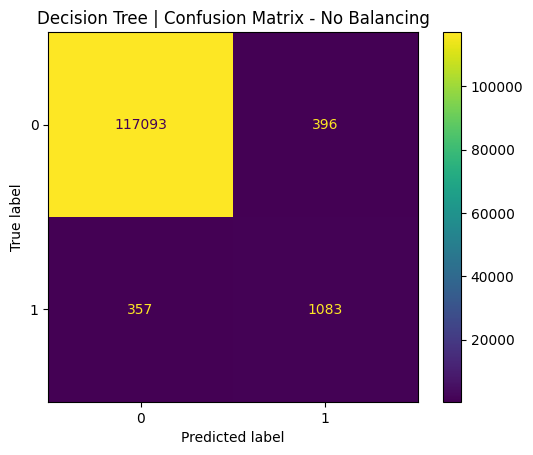

In [374]:
ConfusionMatrixDisplay.from_predictions(y_test, DT_NB_y_pred)
plt.title("Decision Tree | Confusion Matrix - No Balancing")

In [539]:
DT_NB_y_proba = DT_NB_pipeline.predict_proba(X_test)[:, 1]
print("Decision Tree - No Balance | Test ROC-AUC:", roc_auc_score(y_test, DT_NB_y_proba))
print("Decision Tree - No Balance | Test PR-AUC (Average Precision):", average_precision_score(y_test, DT_NB_y_proba))

Decision Tree - No Balance | Test ROC-AUC: 0.8743564025142778
Decision Tree - No Balance | Test PR-AUC (Average Precision): 0.5537159559608723


#### Class Weight : Balance

In [377]:
DT_CWB_preprocessor = ColumnTransformer(
    transformers= [
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop= "first"), categorical_features)
    ],
    remainder= "drop"
)

In [378]:
DT_CWB_pipeline = Pipeline(
    [
        ("prep", DT_CWB_preprocessor),
        ("clf", DecisionTreeClassifier(class_weight="balanced", random_state= 42))
    ]
)

In [379]:
DT_CWB_cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

In [380]:
DT_CWB_scores_auc = cross_val_score(DT_CWB_pipeline, X_train, y_train, cv=DT_CWB_cv, scoring="roc_auc", n_jobs=-1)
DT_CWB_scores_ap  = cross_val_score(DT_CWB_pipeline, X_train, y_train, cv=DT_CWB_cv, scoring="average_precision", n_jobs=-1)


In [381]:
print("Mean ROC-AUC:", DT_CWB_scores_auc.mean())
print("Mean PR-AUC:", DT_CWB_scores_ap.mean())

Mean ROC-AUC: 0.8703646508363905
Mean PR-AUC: 0.569726358276656


In [382]:
DT_CWB_pipeline.fit(X_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [383]:
DT_CWB_y_pred = DT_CWB_pipeline.predict(X_test)

In [384]:
print(classification_report(y_test, DT_CWB_y_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117489
           1       0.76      0.74      0.75      1440

    accuracy                           0.99    118929
   macro avg       0.88      0.87      0.87    118929
weighted avg       0.99      0.99      0.99    118929



In [385]:
confusion_matrix(y_test, DT_CWB_y_pred) 

array([[117151,    338],
       [   368,   1072]])

Text(0.5, 1.0, 'Decision Tree | Confusion Matrix - With Class Weight Balanced')

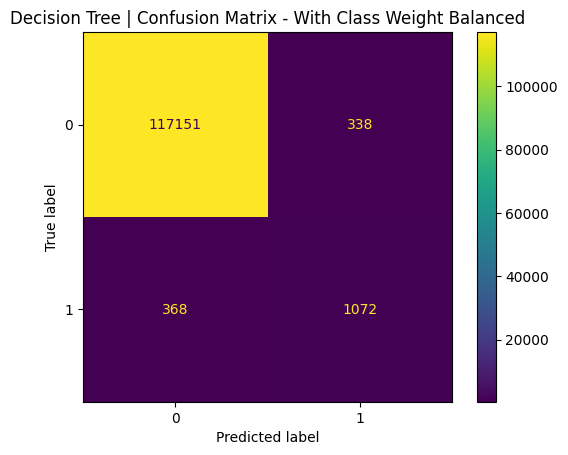

In [386]:
ConfusionMatrixDisplay.from_predictions(y_test, DT_CWB_y_pred)
plt.title("Decision Tree | Confusion Matrix - With Class Weight Balanced")

In [540]:
DT_CWB_y_proba = DT_CWB_pipeline.predict_proba(X_test)[:, 1]
print("Decision Tree - Class Weight Balanced | Test ROC-AUC:", roc_auc_score(y_test, DT_CWB_y_proba))
print("Decision Tree - Class Weight Balanced | Test PR-AUC (Average Precision):", average_precision_score(y_test, DT_CWB_y_proba))

Decision Tree - Class Weight Balanced | Test ROC-AUC: 0.8707837896881127
Decision Tree - Class Weight Balanced | Test PR-AUC (Average Precision): 0.5690832508348197


#### SMOTE

In [388]:
DT_SMT_preprocessor = ColumnTransformer(
    transformers= [
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop= "first"), categorical_features)
    ],
    remainder= "drop"
)

In [389]:
DT_SMT_pipeline = ImbPipeline(
    [
        ("prep", DT_SMT_preprocessor),
        ("smote", SMOTE()),
        ("clf", DecisionTreeClassifier(random_state= 42))
    ]
)

In [390]:
DT_SMT_cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

In [391]:
DT_SMT_scores_auc = cross_val_score(DT_SMT_pipeline, X_train, y_train, cv=DT_SMT_cv, scoring="roc_auc", n_jobs=-1)
DT_SMT_scores_ap  = cross_val_score(DT_SMT_pipeline, X_train, y_train, cv=DT_SMT_cv, scoring="average_precision", n_jobs=-1)

In [392]:
print("Mean ROC-AUC:", DT_SMT_scores_auc.mean())
print("Mean PR-AUC:", DT_SMT_scores_ap.mean())

Mean ROC-AUC: 0.8995907254169179
Mean PR-AUC: 0.5265392327568332


In [393]:
DT_SMT_pipeline.fit(X_train, y_train)

,steps,"[('prep', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [394]:
DT_SMT_y_pred = DT_SMT_pipeline.predict(X_test)

In [395]:
print(classification_report(y_test, DT_SMT_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    117489
           1       0.65      0.81      0.72      1440

    accuracy                           0.99    118929
   macro avg       0.82      0.90      0.86    118929
weighted avg       0.99      0.99      0.99    118929



In [396]:
confusion_matrix(y_test, DT_SMT_y_pred)

array([[116870,    619],
       [   279,   1161]])

Text(0.5, 1.0, 'Decision Tree | Confusion Matrix - With SMOTE')

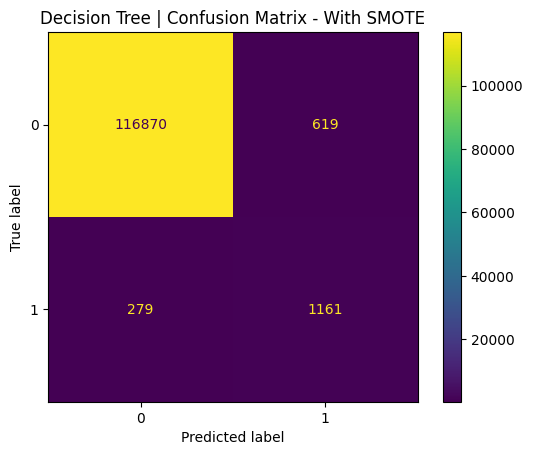

In [397]:
ConfusionMatrixDisplay.from_predictions(y_test, DT_SMT_y_pred)
plt.title("Decision Tree | Confusion Matrix - With SMOTE")

In [541]:
DT_SMT_y_proba = DT_SMT_pipeline.predict_proba(X_test)[:, 1]
print("Decision Tree - SMOTE | Test ROC-AUC:", roc_auc_score(y_test, DT_SMT_y_proba))
print("Decision Tree - SMOTE | Test PR-AUC (Average Precision):", average_precision_score(y_test, DT_SMT_y_proba))


Decision Tree - SMOTE | Test ROC-AUC: 0.9004907108325034
Decision Tree - SMOTE | Test PR-AUC (Average Precision): 0.5282202352449262


#### Under-Sampling

In [399]:
DT_US_preprocessor = ColumnTransformer(
    transformers= [
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop= "first"), categorical_features)
    ],
    remainder= "drop"
)

In [400]:
DT_US_pipeline = ImbPipeline(
    [
        ("prep", DT_US_preprocessor),
        ("raus", RandomUnderSampler()),
        ("clf", DecisionTreeClassifier(random_state= 42))
    ]
)

In [401]:
DT_US_cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

In [402]:
DT_US_scores_auc = cross_val_score(DT_US_pipeline, X_train, y_train, cv=DT_US_cv, scoring="roc_auc", n_jobs=-1)
DT_US_scores_ap  = cross_val_score(DT_US_pipeline, X_train, y_train, cv=DT_US_cv, scoring="average_precision", n_jobs=-1)

In [403]:
print("Mean ROC-AUC:", DT_US_scores_auc.mean())
print("Mean PR-AUC:", DT_US_scores_ap.mean())

Mean ROC-AUC: 0.9685078685807202
Mean PR-AUC: 0.2551492221780013


In [404]:
DT_US_pipeline.fit(X_train, y_train)

,steps,"[('prep', ...), ('raus', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [405]:
DT_US_y_pred = DT_US_pipeline.predict(X_test) 

In [406]:
print(classification_report(y_test, DT_US_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    117489
           1       0.27      0.97      0.43      1440

    accuracy                           0.97    118929
   macro avg       0.64      0.97      0.70    118929
weighted avg       0.99      0.97      0.98    118929



In [407]:
confusion_matrix(y_test, DT_US_y_pred)

array([[113756,   3733],
       [    40,   1400]])

Text(0.5, 1.0, 'Decision Tree | Confusion Matrix - With Under-Sampling')

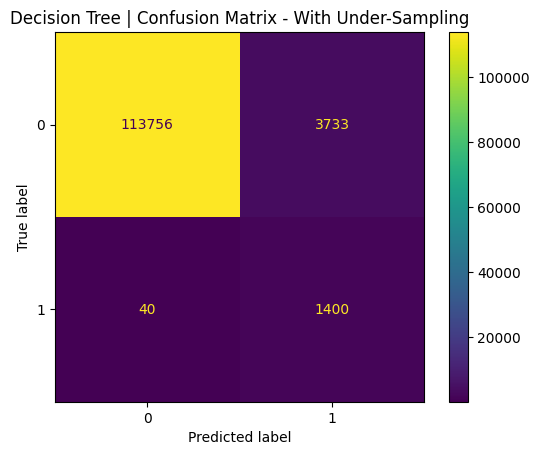

In [408]:
ConfusionMatrixDisplay.from_predictions(y_test, DT_US_y_pred)
plt.title("Decision Tree | Confusion Matrix - With Under-Sampling")

In [542]:
DT_US_y_proba = DT_US_pipeline.predict_proba(X_test)[:, 1]
print("Decision Tree - Under-Sampling | Test ROC-AUC:", roc_auc_score(y_test, DT_US_y_proba))
print("Decision Tree - Under-Sampling | Test PR-AUC (Average Precision):", average_precision_score(y_test, DT_US_y_proba))

Decision Tree - Under-Sampling | Test ROC-AUC: 0.9702245174725579
Decision Tree - Under-Sampling | Test PR-AUC (Average Precision): 0.2655050690247876


### *Random Forest*

#### No Balancing

In [410]:
from sklearn.ensemble import RandomForestClassifier

In [411]:
RF_NB_preprocessor = ColumnTransformer(
    transformers= [
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop= "first"), categorical_features)
    ],
    remainder= "drop"
)

In [412]:
RF_NB_pipeline = Pipeline(
    [
        ("prep", RF_NB_preprocessor),
        ("clf", (RandomForestClassifier(random_state= 42)))
    ]
)

In [413]:
RF_NB_cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state=42)

In [414]:
RF_NB_scores_auc = cross_val_score(RF_NB_pipeline, X_train, y_train, cv=RF_NB_cv, scoring="roc_auc", n_jobs=-1)
RF_NB_scores_ap  = cross_val_score(RF_NB_pipeline, X_train, y_train, cv=RF_NB_cv, scoring="average_precision", n_jobs=-1)

In [415]:
print("Mean ROC-AUC:", RF_NB_scores_auc.mean())
print("Mean PR-AUC:", RF_NB_scores_ap.mean())

Mean ROC-AUC: 0.9851703474832298
Mean PR-AUC: 0.8804954033582584


In [416]:
RF_NB_pipeline.fit(X_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [417]:
RF_NB_y_pred = RF_NB_pipeline.predict(X_test)

In [418]:
print(classification_report(y_test, RF_NB_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117489
           1       0.85      0.76      0.80      1440

    accuracy                           1.00    118929
   macro avg       0.93      0.88      0.90    118929
weighted avg       1.00      1.00      1.00    118929



In [419]:
confusion_matrix(y_test, RF_NB_y_pred)

array([[117302,    187],
       [   351,   1089]])

Text(0.5, 1.0, 'Random Forest | Confusion Matrix - No Balancing')

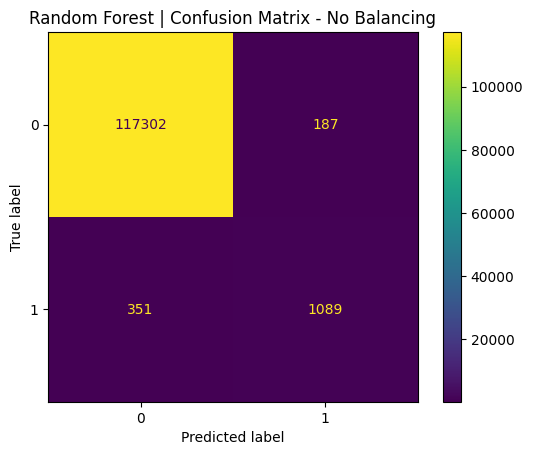

In [420]:
ConfusionMatrixDisplay.from_predictions(y_test, RF_NB_y_pred)
plt.title("Random Forest | Confusion Matrix - No Balancing")

In [543]:
RF_NB_y_proba = RF_NB_pipeline.predict_proba(X_test)[:, 1]
print("Random Forest - No Balance | Test ROC-AUC:", roc_auc_score(y_test, RF_NB_y_proba))
print("Random Forest - No Balance | Test PR-AUC (Average Precision):", average_precision_score(y_test, RF_NB_y_proba))

Random Forest - No Balance | Test ROC-AUC: 0.982158583876883
Random Forest - No Balance | Test PR-AUC (Average Precision): 0.8721763577230759


#### Class Weight : Balance

In [422]:
RF_CWB_preprocessor = ColumnTransformer(
    transformers= [
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop= "first"), categorical_features)
    ],
    remainder= "drop"
)

In [423]:
RF_CWB_pipeline = Pipeline(
    [
        ("prep", RF_CWB_preprocessor),
        ("clf", RandomForestClassifier(class_weight="balanced", random_state= 42))
    ]
)

In [424]:
RF_CWB_cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

In [425]:
RF_CWB_scores_auc = cross_val_score(RF_CWB_pipeline, X_train, y_train, cv=RF_CWB_cv, scoring="roc_auc", n_jobs=-1)
RF_CWB_scores_ap  = cross_val_score(RF_CWB_pipeline, X_train, y_train, cv=RF_CWB_cv, scoring="average_precision", n_jobs=-1)

In [426]:
print("Mean ROC-AUC:", RF_CWB_scores_auc.mean())
print("Mean PR-AUC:", RF_CWB_scores_ap.mean())

Mean ROC-AUC: 0.9870503801031635
Mean PR-AUC: 0.8778786266185848


In [427]:
RF_CWB_pipeline.fit(X_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [428]:
RF_CWB_y_pred = RF_CWB_pipeline.predict(X_test)

In [429]:
print(classification_report(y_test, RF_CWB_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117489
           1       0.86      0.75      0.80      1440

    accuracy                           1.00    118929
   macro avg       0.93      0.88      0.90    118929
weighted avg       1.00      1.00      1.00    118929



In [430]:
confusion_matrix(y_test, RF_CWB_y_pred)

array([[117311,    178],
       [   355,   1085]])

Text(0.5, 1.0, 'Random Forest | Confusion Matrix - With Class Weight Balanced')

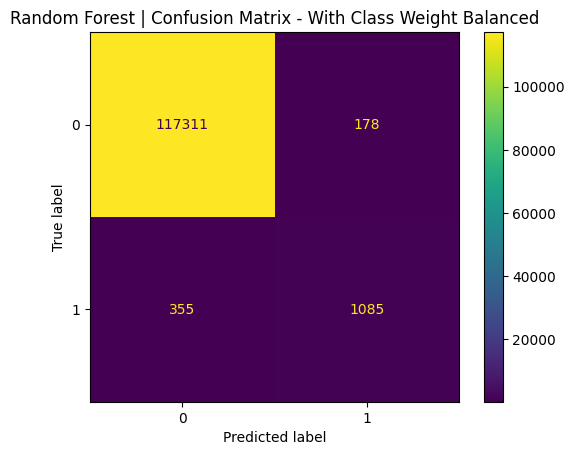

In [431]:
ConfusionMatrixDisplay.from_predictions(y_test, RF_CWB_y_pred)
plt.title("Random Forest | Confusion Matrix - With Class Weight Balanced")

In [544]:
RF_CWB_y_proba = RF_CWB_pipeline.predict_proba(X_test)[:, 1]
print("Random Forest - Class Weight Balance | Test ROC-AUC:", roc_auc_score(y_test, RF_CWB_y_proba))
print("Random Forest - Class Weight Balance | Test PR-AUC (Average Precision):", average_precision_score(y_test, RF_CWB_y_proba))

Random Forest - Class Weight Balance | Test ROC-AUC: 0.9852482909747581
Random Forest - Class Weight Balance | Test PR-AUC (Average Precision): 0.8651557889363521


#### SMOTE

In [433]:
RF_SMT_preprocessor = ColumnTransformer(
    transformers= [
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop= "first"), categorical_features)
    ],
    remainder= "drop"
)

In [434]:
RF_SMT_pipeline = ImbPipeline(
    [
        ("prep", RF_SMT_preprocessor),
        ("smote", SMOTE()),
        ("clf", RandomForestClassifier(random_state= 42))
    ]
)

In [435]:
RF_SMT_cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

In [436]:
RF_SMT_scores_auc = cross_val_score(RF_SMT_pipeline, X_train, y_train, cv=RF_SMT_cv, scoring="roc_auc", n_jobs=-1)
RF_SMT_scores_ap  = cross_val_score(RF_SMT_pipeline, X_train, y_train, cv=RF_SMT_cv, scoring="average_precision", n_jobs=-1)

In [437]:
print("Mean ROC-AUC:", RF_SMT_scores_auc.mean())
print("Mean PR-AUC:", RF_SMT_scores_ap.mean())

Mean ROC-AUC: 0.9919941000601421
Mean PR-AUC: 0.8206383050278259


In [438]:
RF_SMT_pipeline.fit(X_train, y_train)

,steps,"[('prep', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [439]:
RF_SMT_y_pred = RF_SMT_pipeline.predict(X_test)

In [440]:
print(classification_report(y_test, RF_SMT_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117489
           1       0.68      0.84      0.75      1440

    accuracy                           0.99    118929
   macro avg       0.84      0.92      0.88    118929
weighted avg       0.99      0.99      0.99    118929



In [441]:
confusion_matrix(y_test, RF_SMT_y_pred)

array([[116920,    569],
       [   225,   1215]])

Text(0.5, 1.0, 'Random Forest | Confusion Matrix - With SMOTE')

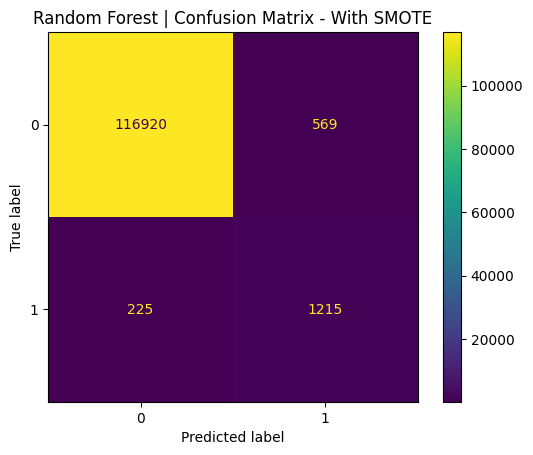

In [442]:
ConfusionMatrixDisplay.from_predictions(y_test, RF_SMT_y_pred)
plt.title("Random Forest | Confusion Matrix - With SMOTE")

In [545]:
RF_SMT_y_proba = RF_SMT_pipeline.predict_proba(X_test)[:, 1]
print("Random Forest - SMOTE | Test ROC-AUC:", roc_auc_score(y_test, RF_SMT_y_proba))
print("Random Forest - SMOTE | Test PR-AUC (Average Precision):", average_precision_score(y_test, RF_SMT_y_proba))

Random Forest - SMOTE | Test ROC-AUC: 0.9917109881918025
Random Forest - SMOTE | Test PR-AUC (Average Precision): 0.805591951354641


#### Under-Sampling

In [444]:
RF_US_preprocessor = ColumnTransformer(
    transformers= [
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop= "first"), categorical_features)
    ],
    remainder= "drop"
)

In [445]:
RF_US_pipeline = ImbPipeline(
    [
        ("prep", RF_US_preprocessor),
        ("raus", RandomUnderSampler()),
        ("clf", RandomForestClassifier(random_state= 42))
    ]
)

In [446]:
RF_US_cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

In [447]:
RF_US_scores_auc = cross_val_score(RF_US_pipeline, X_train, y_train, cv=RF_US_cv, scoring="roc_auc", n_jobs=-1)
RF_US_scores_ap  = cross_val_score(RF_US_pipeline, X_train, y_train, cv=RF_US_cv, scoring="average_precision", n_jobs=-1)

In [448]:
print("Mean ROC-AUC:", RF_US_scores_auc.mean())
print("Mean PR-AUC:", RF_US_scores_ap.mean())

Mean ROC-AUC: 0.9964773660065986
Mean PR-AUC: 0.759244494491381


In [449]:
RF_US_pipeline.fit(X_train, y_train)

,steps,"[('prep', ...), ('raus', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [450]:
RF_US_y_pred = RF_US_pipeline.predict(X_test)

In [451]:
print(classification_report(y_test, RF_US_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    117489
           1       0.26      0.98      0.41      1440

    accuracy                           0.97    118929
   macro avg       0.63      0.97      0.70    118929
weighted avg       0.99      0.97      0.98    118929



In [452]:
confusion_matrix(y_test, RF_US_y_pred)

array([[113490,   3999],
       [    28,   1412]])

Text(0.5, 1.0, 'Random Forest | Confusion Matrix - With Under-Sampling')

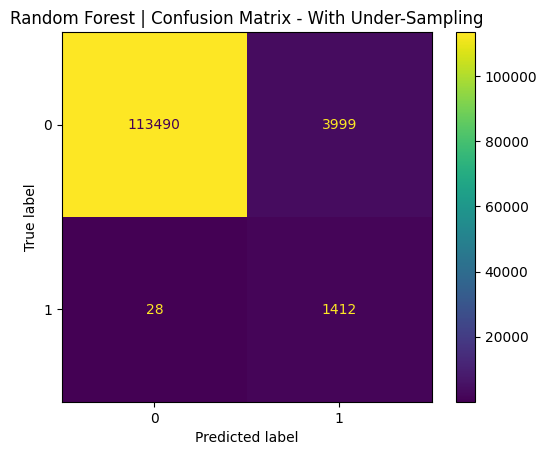

In [453]:
ConfusionMatrixDisplay.from_predictions(y_test, RF_US_y_pred)
plt.title("Random Forest | Confusion Matrix - With Under-Sampling")

In [546]:
RF_US_y_proba = RF_US_pipeline.predict_proba(X_test)[:, 1]
print("Random Forest - Under-Sampling | Test ROC-AUC:", roc_auc_score(y_test, RF_US_y_proba))
print("Random Forest - Under-Sampling | Test PR-AUC (Average Precision):", average_precision_score(y_test, RF_US_y_proba))

Random Forest - Under-Sampling | Test ROC-AUC: 0.9962276817167753
Random Forest - Under-Sampling | Test PR-AUC (Average Precision): 0.7609021751269198


### *XGBoost*

In [455]:
import xgboost as xgb

#### No Balancing 

In [456]:
XGB_NB_preprocessor = ColumnTransformer(
    transformers= [
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop= "first"), categorical_features)
    ],
    remainder= "drop"
)

In [457]:
XGB_NB_pipeline = Pipeline(
    [
        ("prep", XGB_NB_preprocessor),
        ("clf", (xgb.XGBClassifier(random_state= 42)))
    ]
)

In [458]:
XGB_NB_cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state=42)

In [459]:
XGB_NB_scores_auc = cross_val_score(XGB_NB_pipeline, X_train, y_train, cv=XGB_NB_cv, scoring="roc_auc", n_jobs=-1)
XGB_NB_scores_ap  = cross_val_score(XGB_NB_pipeline, X_train, y_train, cv=XGB_NB_cv, scoring="average_precision", n_jobs=-1)

In [460]:
print("Mean ROC-AUC:", XGB_NB_scores_auc.mean())
print("Mean PR-AUC:", XGB_NB_scores_ap.mean())

Mean ROC-AUC: 0.9752234632493522
Mean PR-AUC: 0.8418421215004189


In [461]:
XGB_NB_pipeline.fit(X_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [462]:
XGB_NB_y_pred = XGB_NB_pipeline.predict(X_test)

In [463]:
print(classification_report(y_test, XGB_NB_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117489
           1       0.87      0.73      0.80      1440

    accuracy                           1.00    118929
   macro avg       0.93      0.86      0.90    118929
weighted avg       1.00      1.00      1.00    118929



In [464]:
confusion_matrix(y_test, XGB_NB_y_pred)

array([[117336,    153],
       [   389,   1051]])

Text(0.5, 1.0, 'XGBoost | Confusion Matrix - No Balance')

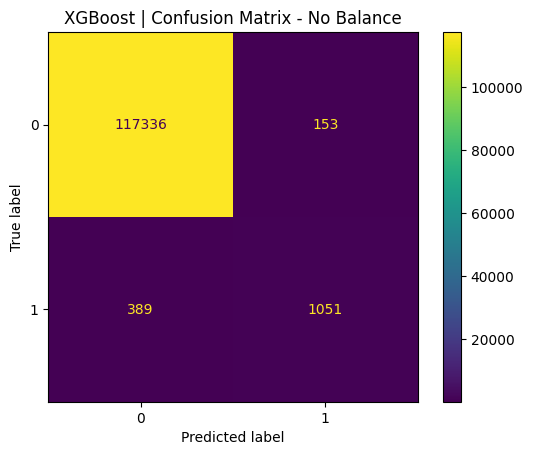

In [465]:
ConfusionMatrixDisplay.from_predictions(y_test, XGB_NB_y_pred)
plt.title("XGBoost | Confusion Matrix - No Balance")

In [547]:
XGB_NB_y_proba = XGB_NB_pipeline.predict_proba(X_test)[:, 1]
print("XGBoost - No Balance | Test ROC-AUC:", roc_auc_score(y_test, XGB_NB_y_proba))
print("XGBoost - No Balance | Test PR-AUC (Average Precision):", average_precision_score(y_test, XGB_NB_y_proba))

XGBoost - No Balance | Test ROC-AUC: 0.9836752299978911
XGBoost - No Balance | Test PR-AUC (Average Precision): 0.8529690583976469


#### Class Weight : Balance

In [467]:
XGB_CWB_preprocessor = ColumnTransformer(
    transformers= [
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop= "first"), categorical_features)
    ],
    remainder= "drop"
)

In [468]:
XGB_CWB_pipeline = Pipeline(
    [
        ("prep", XGB_CWB_preprocessor),
        ("clf", xgb.XGBClassifier(class_weight="balanced", random_state= 42))
    ]
)

In [469]:
XGB_CWB_cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

In [470]:
XGB_CWB_scores_auc = cross_val_score(XGB_CWB_pipeline, X_train, y_train, cv=XGB_CWB_cv, scoring="roc_auc", n_jobs=-1)
XGB_CWB_scores_ap  = cross_val_score(XGB_CWB_pipeline, X_train, y_train, cv=XGB_CWB_cv, scoring="average_precision", n_jobs=-1)

In [471]:
print("Mean ROC-AUC:", XGB_CWB_scores_auc.mean())
print("Mean PR-AUC:", XGB_CWB_scores_ap.mean())

Mean ROC-AUC: 0.9752234632493522
Mean PR-AUC: 0.8418421215004189


In [472]:
XGB_CWB_pipeline.fit(X_train, y_train)

c:\Users\walqawasmi001\OneDrive - pwc\Desktop\Python\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:10:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [473]:
XGB_CWB_y_pred = XGB_CWB_pipeline.predict(X_test)

In [474]:
print(classification_report(y_test, XGB_CWB_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117489
           1       0.87      0.73      0.80      1440

    accuracy                           1.00    118929
   macro avg       0.93      0.86      0.90    118929
weighted avg       1.00      1.00      1.00    118929



In [475]:
confusion_matrix(y_test, XGB_CWB_y_pred)

array([[117336,    153],
       [   389,   1051]])

Text(0.5, 1.0, 'XGBoost | Confusion Matrix - With Class Weight Balanced')

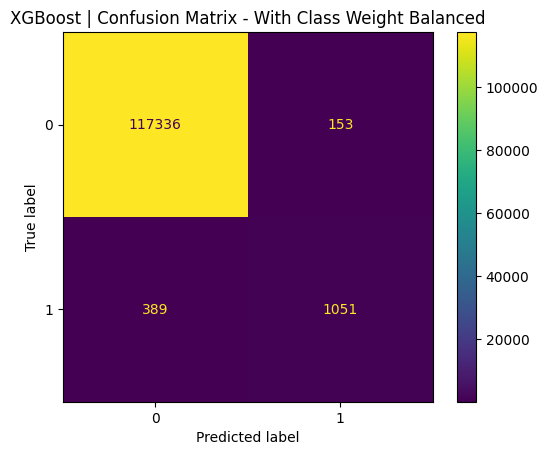

In [476]:
ConfusionMatrixDisplay.from_predictions(y_test, XGB_CWB_y_pred)
plt.title("XGBoost | Confusion Matrix - With Class Weight Balanced")

In [548]:
XGB_CWB_y_proba = XGB_CWB_pipeline.predict_proba(X_test)[:, 1]
print("XGBoost - Class Weight Balance | Test ROC-AUC:", roc_auc_score(y_test, XGB_CWB_y_proba))
print("XGBoost - Class Weight Balance | Test PR-AUC (Average Precision):", average_precision_score(y_test, XGB_CWB_y_proba))

XGBoost - Class Weight Balance | Test ROC-AUC: 0.9836752299978911
XGBoost - Class Weight Balance | Test PR-AUC (Average Precision): 0.8529690583976469


#### SMOTE

In [478]:
XGB_SMT_preprocessor = ColumnTransformer(
    transformers= [
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop= "first"), categorical_features)
    ],
    remainder= "drop"
)

In [479]:
XGB_SMT_pipeline = ImbPipeline(
    [
        ("prep", XGB_SMT_preprocessor),
        ("smote", SMOTE()),
        ("clf", xgb.XGBClassifier( random_state= 42))
    ]
)

In [480]:
XGB_SMT_cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

In [481]:
XGB_SMT_scores_auc = cross_val_score(XGB_SMT_pipeline, X_train, y_train, cv=XGB_SMT_cv, scoring="roc_auc", n_jobs=-1)
XGB_SMT_scores_ap  = cross_val_score(XGB_SMT_pipeline, X_train, y_train, cv=XGB_SMT_cv, scoring="average_precision", n_jobs=-1)

In [482]:
print("Mean ROC-AUC:", XGB_SMT_scores_auc.mean())
print("Mean PR-AUC:", XGB_SMT_scores_ap.mean())

Mean ROC-AUC: 0.9972673905037898
Mean PR-AUC: 0.8899814061636004


In [483]:
XGB_SMT_pipeline.fit(X_train, y_train)

,steps,"[('prep', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [484]:
XGB_SMT_y_pred = XGB_SMT_pipeline.predict(X_test)

In [485]:
print(classification_report(y_test, XGB_SMT_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    117489
           1       0.61      0.90      0.73      1440

    accuracy                           0.99    118929
   macro avg       0.80      0.94      0.86    118929
weighted avg       0.99      0.99      0.99    118929



In [486]:
confusion_matrix(y_test, XGB_SMT_y_pred)

array([[116665,    824],
       [   150,   1290]])

Text(0.5, 1.0, 'XGBoost | Confusion Matrix - With SMOTE')

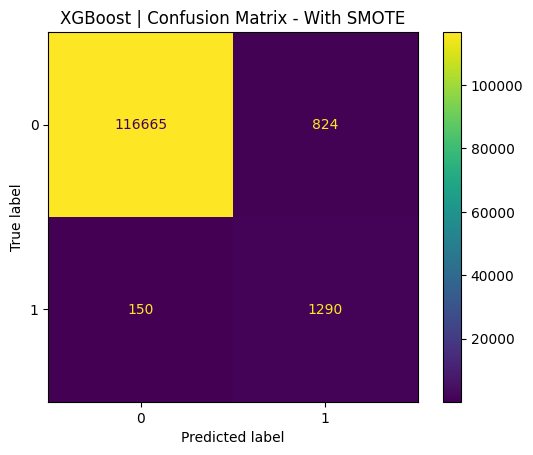

In [487]:
ConfusionMatrixDisplay.from_predictions(y_test, XGB_SMT_y_pred)
plt.title("XGBoost | Confusion Matrix - With SMOTE")

In [549]:
XGB_SMT_y_proba = XGB_SMT_pipeline.predict_proba(X_test)[:, 1]
print("XGBoost - SMOTE | Test ROC-AUC:", roc_auc_score(y_test, XGB_SMT_y_proba))
print("XGBoost - SMOTE | Test PR-AUC (Average Precision):", average_precision_score(y_test, XGB_SMT_y_proba))

XGBoost - SMOTE | Test ROC-AUC: 0.9970594971775136
XGBoost - SMOTE | Test PR-AUC (Average Precision): 0.8828337603112482


#### Under-Sampling

In [489]:
XGB_US_preprocessor = ColumnTransformer(
    transformers= [
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop= "first"), categorical_features)
    ],
    remainder= "drop"
)

In [490]:
XGB_US_pipeline = ImbPipeline(
    [
        ("prep", XGB_US_preprocessor),
        ("raus", RandomUnderSampler()),
        ("clf", xgb.XGBClassifier(random_state = 42))
    ]
)

In [491]:
XGB_US_cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

In [492]:
XGB_US_scores_auc = cross_val_score(XGB_US_pipeline, X_train, y_train, cv=XGB_US_cv, scoring="roc_auc", n_jobs=-1) 
XGB_US_scores_ap  = cross_val_score(XGB_US_pipeline, X_train, y_train, cv=XGB_US_cv, scoring="average_precision", n_jobs=-1)

In [493]:
print("Mean ROC-AUC:", XGB_US_scores_auc.mean())
print("Mean PR-AUC:", XGB_US_scores_ap.mean())

Mean ROC-AUC: 0.9966497434518405
Mean PR-AUC: 0.8469828575235306


In [494]:
XGB_US_pipeline.fit(X_train, y_train)

,steps,"[('prep', ...), ('raus', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [495]:
XGB_US_y_pred = XGB_US_pipeline.predict(X_test)

In [496]:
print(classification_report(y_test, XGB_US_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    117489
           1       0.27      0.98      0.43      1440

    accuracy                           0.97    118929
   macro avg       0.64      0.97      0.70    118929
weighted avg       0.99      0.97      0.98    118929



In [497]:
confusion_matrix(y_test, XGB_US_y_pred)

array([[113704,   3785],
       [    30,   1410]])

Text(0.5, 1.0, 'XGBoost | Confusion Matrix - With Under-Sampling')

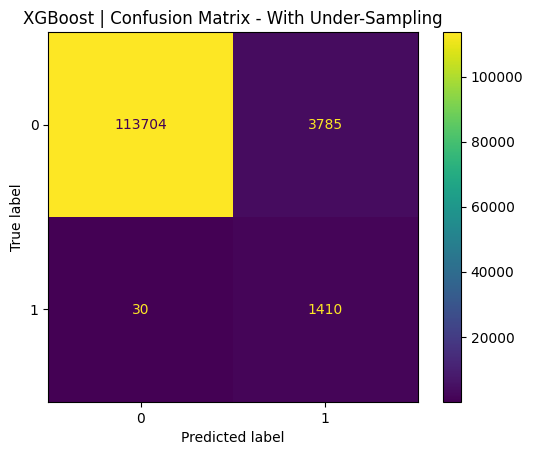

In [498]:
ConfusionMatrixDisplay.from_predictions(y_test, XGB_US_y_pred)
plt.title("XGBoost | Confusion Matrix - With Under-Sampling")

In [552]:
XGB_US_y_proba = XGB_US_pipeline.predict_proba(X_test)[:, 1]
print("XGBoost - Under-Sampling | Test ROC-AUC:", roc_auc_score(y_test, XGB_US_y_proba))
print("XGBoost - Under-Sampling | Test PR-AUC (Average Precision):", average_precision_score(y_test, XGB_US_y_proba))

XGBoost - Under-Sampling | Test ROC-AUC: 0.9967283787087396
XGBoost - Under-Sampling | Test PR-AUC (Average Precision): 0.8555858703659096


### Models Evaluation

### Fine-tuning and Optimization

Threshold=0.00 | Precision=0.012 | Recall=1.000 | F1=0.024
Threshold=0.05 | Precision=0.253 | Recall=0.983 | F1=0.402
Threshold=0.10 | Precision=0.316 | Recall=0.972 | F1=0.477
Threshold=0.15 | Precision=0.364 | Recall=0.962 | F1=0.528
Threshold=0.20 | Precision=0.407 | Recall=0.950 | F1=0.570
Threshold=0.25 | Precision=0.444 | Recall=0.938 | F1=0.602
Threshold=0.30 | Precision=0.485 | Recall=0.930 | F1=0.638
Threshold=0.35 | Precision=0.523 | Recall=0.922 | F1=0.667
Threshold=0.40 | Precision=0.549 | Recall=0.910 | F1=0.685
Threshold=0.45 | Precision=0.584 | Recall=0.904 | F1=0.709
Threshold=0.50 | Precision=0.610 | Recall=0.896 | F1=0.726
Threshold=0.55 | Precision=0.638 | Recall=0.887 | F1=0.742
Threshold=0.60 | Precision=0.664 | Recall=0.876 | F1=0.756
Threshold=0.65 | Precision=0.693 | Recall=0.866 | F1=0.770
Threshold=0.70 | Precision=0.714 | Recall=0.849 | F1=0.775
Threshold=0.75 | Precision=0.747 | Recall=0.833 | F1=0.787
Threshold=0.80 | Precision=0.779 | Recall=0.813 | F1=0.7

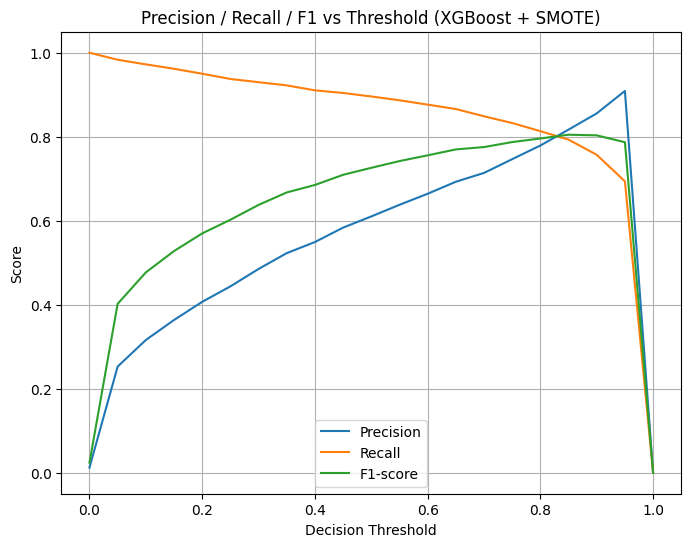


Best Threshold (by F1): 0.881
Precision=0.843, Recall=0.775, F1=0.808


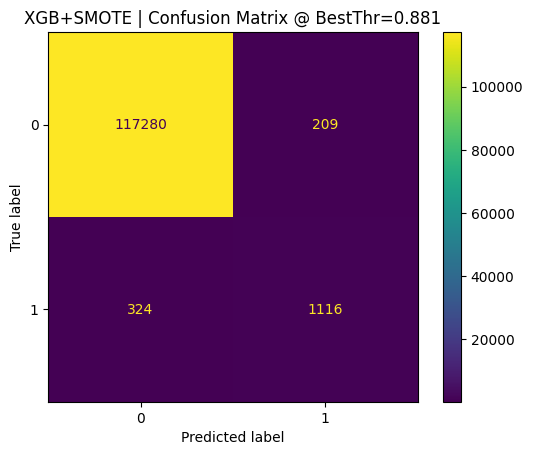

In [553]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay

# Loop through thresholds
thresholds = np.linspace(0, 1, 21)  # thresholds from 0.0 → 1.0 in steps of 0.05
metrics = []

for thr in thresholds:
    y_pred_thr = (XGB_SMT_y_proba >= thr).astype(int)
    p = precision_score(y_test, y_pred_thr, zero_division=0)
    r = recall_score(y_test, y_pred_thr, zero_division=0)
    f = f1_score(y_test, y_pred_thr, zero_division=0)
    metrics.append([thr, p, r, f])
    print(f"Threshold={thr:.2f} | Precision={p:.3f} | Recall={r:.3f} | F1={f:.3f}")

# Convert to array for plotting
metrics = np.array(metrics)
plt.figure(figsize=(8,6))
plt.plot(metrics[:,0], metrics[:,1], label="Precision")
plt.plot(metrics[:,0], metrics[:,2], label="Recall")
plt.plot(metrics[:,0], metrics[:,3], label="F1-score")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision / Recall / F1 vs Threshold (XGBoost + SMOTE)")
plt.legend()
plt.grid(True)
plt.show()

# Find best threshold by F1
prec, rec, thr = precision_recall_curve(y_test, XGB_SMT_y_proba)
f1s = 2*prec*rec/(prec+rec+1e-12)
best_idx = np.argmax(f1s)
best_thr = thr[best_idx-1] if best_idx > 0 else 0.5

print(f"\nBest Threshold (by F1): {best_thr:.3f}")
print(f"Precision={prec[best_idx]:.3f}, Recall={rec[best_idx]:.3f}, F1={f1s[best_idx]:.3f}")

# Optional: show confusion matrix at best threshold
y_pred_best = (XGB_SMT_y_proba >= best_thr).astype(int)
cm = confusion_matrix(y_test, y_pred_best)
ConfusionMatrixDisplay(cm).plot()
plt.title(f"XGB+SMOTE | Confusion Matrix @ BestThr={best_thr:.3f}")
plt.show()


In [554]:
import optuna 

c:\Users\walqawasmi001\OneDrive - pwc\Desktop\Python\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [562]:
XGB_SMT_Optuna_preprocessor = ColumnTransformer(
    transformers= [
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop= "first"), categorical_features)
    ],
    remainder= "drop"
)

In [563]:
def make_pipe(params):
    XGB_SMT_Optuna = xgb.XGBClassifier(
        n_estimators=int(params["n_estimators"]),
        max_depth=int(params["max_depth"]),
        learning_rate=params["learning_rate"],
        subsample=params["subsample"],
        colsample_bytree=params["colsample_bytree"],
        min_child_weight=params["min_child_weight"],
        gamma=params["gamma"],
        reg_alpha=params["reg_alpha"],
        reg_lambda=params["reg_lambda"],
        eval_metric="aucpr",
        random_state=42,
        n_jobs=-1,
    )
    return ImbPipeline([
        ("prep", XGB_SMT_Optuna_preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("clf", XGB_SMT_Optuna),
    ])


In [564]:
XGB_SMT_Optuna_cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

In [566]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 900, step=100),
        "max_depth": trial.suggest_int("max_depth", 4, 9),
        "learning_rate": trial.suggest_float("learning_rate", 0.03, 0.15, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "min_child_weight": trial.suggest_float("min_child_weight", 1.0, 10.0),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.5, 5.0),
    }

    XGB_SMT_Optuna_pipe = make_pipe(params)

    scores = []
    for tr_idx, va_idx in cv.split(X_train, y_train):
        X_tr, X_va = X_train.iloc[tr_idx], X_train.iloc[va_idx]
        y_tr, y_va = y_train.iloc[tr_idx], y_train.iloc[va_idx]

        XGB_SMT_Optuna_pipe.fit(X_tr, y_tr)
        proba = XGB_SMT_Optuna_pipe.predict_proba(X_va)[:, 1]
        scores.append(average_precision_score(y_va, proba))

        trial.report(scores[-1], step=len(scores))
        if trial.should_prune():
            raise optuna.TrialPruned()

    return float(np.mean(scores))

In [567]:
study = optuna.create_study(direction="maximize",
                            pruner=optuna.pruners.MedianPruner(n_warmup_steps=2))
study.optimize(objective, n_trials=15)

print("Best params:", study.best_params)
print("Best CV PR-AUC:", study.best_value)

[I 2025-09-24 14:43:53,377] A new study created in memory with name: no-name-627476e7-2d90-49f3-9c13-9e00ac69c990
[I 2025-09-24 14:47:20,486] Trial 0 finished with value: 0.8904545424568802 and parameters: {'n_estimators': 700, 'max_depth': 5, 'learning_rate': 0.046355017616227165, 'subsample': 0.865576676937434, 'colsample_bytree': 0.6619099805349978, 'min_child_weight': 8.73182353283056, 'gamma': 4.0372707488072725, 'reg_alpha': 0.0637599228594915, 'reg_lambda': 3.391896128876271}. Best is trial 0 with value: 0.8904545424568802.
[I 2025-09-24 14:53:30,875] Trial 1 finished with value: 0.893336259080584 and parameters: {'n_estimators': 800, 'max_depth': 8, 'learning_rate': 0.03204569927841694, 'subsample': 0.6996217539381235, 'colsample_bytree': 0.6751766625157798, 'min_child_weight': 8.467614347039156, 'gamma': 4.052930986025731, 'reg_alpha': 3.5874172311300705, 'reg_lambda': 4.991865095590401}. Best is trial 1 with value: 0.893336259080584.
[I 2025-09-24 14:58:04,526] Trial 2 finish

Best params: {'n_estimators': 500, 'max_depth': 9, 'learning_rate': 0.10447334845032581, 'subsample': 0.7476539410889382, 'colsample_bytree': 0.6289642201808242, 'min_child_weight': 6.229539384251954, 'gamma': 3.057044153741745, 'reg_alpha': 2.0715286197821436, 'reg_lambda': 3.763283018777647}
Best CV PR-AUC: 0.8949904549111608


#### Best Parameters 

In [568]:
XGB_SMT_Optuna_Best_preprocessor = ColumnTransformer(
    transformers= [
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop= "first"), categorical_features)
    ],
    remainder= "drop"
)

In [570]:
XGB_SMT_Optuna_Best_pipeline = ImbPipeline(
    [
        ("prep", XGB_SMT_Optuna_Best_preprocessor),
        ("smote", SMOTE()),
        ("clf", xgb.XGBClassifier(
            n_estimators=500,
            max_depth=9,
            learning_rate=0.104,
            subsample=0.748,
            colsample_bytree=0.629,
            min_child_weight=6.23,
            gamma=3.06,
            reg_alpha=2.07,
            reg_lambda=3.76,
            eval_metric="aucpr",
            random_state=42,
            n_jobs=-1
        ))
         ]
        )

In [571]:
XGB_SMT_Optuna_Best_cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

In [579]:
XGB_SMT_Optuna_Best_scores_auc = cross_val_score(XGB_SMT_Optuna_Best_pipeline, X_train, y_train, cv=XGB_SMT_Optuna_Best_cv, scoring="roc_auc", n_jobs=-1)
XGB_SMT_Optuna_Best_scores_ap  = cross_val_score(XGB_SMT_Optuna_Best_pipeline, X_train, y_train, cv=XGB_SMT_Optuna_Best_cv, scoring="average_precision", n_jobs=-1)

In [580]:
print("Mean ROC-AUC:", XGB_SMT_Optuna_Best_scores_auc.mean())
print("Mean PR-AUC:", XGB_SMT_Optuna_Best_scores_ap.mean())

Mean ROC-AUC: 0.9974503083346342
Mean PR-AUC: 0.8947891690779664


In [573]:
XGB_SMT_Optuna_Best_pipeline.fit(X_train, y_train)

,steps,"[('prep', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [574]:
XGB_SMT_Optuna_Best_y_pred = XGB_SMT_Optuna_Best_pipeline.predict(X_test)

In [575]:
print(classification_report(y_test, XGB_SMT_Optuna_Best_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    117489
           1       0.67      0.88      0.76      1440

    accuracy                           0.99    118929
   macro avg       0.83      0.94      0.88    118929
weighted avg       0.99      0.99      0.99    118929



In [576]:
confusion_matrix(y_test, XGB_SMT_Optuna_Best_y_pred)

array([[116858,    631],
       [   177,   1263]])

Text(0.5, 1.0, 'XGBoost | Confusion Matrix - With SMOTE & Best Param')

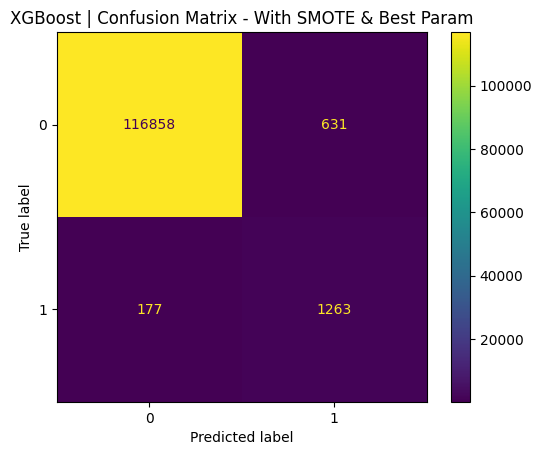

In [577]:
ConfusionMatrixDisplay.from_predictions(y_test, XGB_SMT_Optuna_Best_y_pred)
plt.title("XGBoost | Confusion Matrix - With SMOTE & Best Param")

In [578]:
XGB_SMT_Optuna_Best_y_proba = XGB_SMT_Optuna_Best_pipeline.predict_proba(X_test)[:, 1]
print("XGBoost - SMOTE & Best Param | Test ROC-AUC:", roc_auc_score(y_test, XGB_SMT_Optuna_Best_y_proba))
print("XGBoost - SMOTE & Best Param | Test PR-AUC (Average Precision):", average_precision_score(y_test, XGB_SMT_Optuna_Best_y_proba))

XGBoost - SMOTE & Best Param | Test ROC-AUC: 0.9973119410233204
XGBoost - SMOTE & Best Param | Test PR-AUC (Average Precision): 0.8914537684272608


Threshold=0.00 | Precision=0.012 | Recall=1.000 | F1=0.024
Threshold=0.05 | Precision=0.306 | Recall=0.978 | F1=0.466
Threshold=0.10 | Precision=0.385 | Recall=0.958 | F1=0.549
Threshold=0.15 | Precision=0.447 | Recall=0.947 | F1=0.607
Threshold=0.20 | Precision=0.499 | Recall=0.935 | F1=0.651
Threshold=0.25 | Precision=0.533 | Recall=0.925 | F1=0.676
Threshold=0.30 | Precision=0.566 | Recall=0.919 | F1=0.701
Threshold=0.35 | Precision=0.597 | Recall=0.910 | F1=0.721
Threshold=0.40 | Precision=0.624 | Recall=0.899 | F1=0.737
Threshold=0.45 | Precision=0.647 | Recall=0.888 | F1=0.749
Threshold=0.50 | Precision=0.667 | Recall=0.877 | F1=0.758
Threshold=0.55 | Precision=0.687 | Recall=0.866 | F1=0.766
Threshold=0.60 | Precision=0.712 | Recall=0.860 | F1=0.779
Threshold=0.65 | Precision=0.739 | Recall=0.851 | F1=0.791
Threshold=0.70 | Precision=0.768 | Recall=0.837 | F1=0.801
Threshold=0.75 | Precision=0.798 | Recall=0.818 | F1=0.808
Threshold=0.80 | Precision=0.822 | Recall=0.797 | F1=0.8

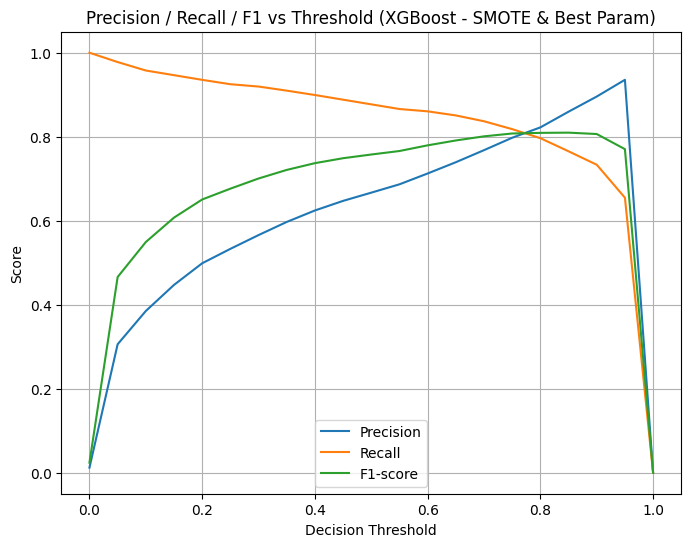


Best Threshold (by F1): 0.761
Precision=0.804, Recall=0.818, F1=0.811


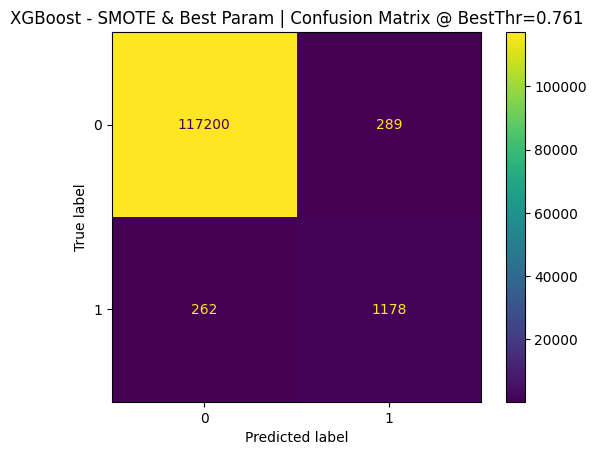

In [582]:

# Loop through thresholds
thresholds = np.linspace(0, 1, 21)  # thresholds from 0.0 → 1.0 in steps of 0.05
metrics = []

for thr in thresholds:
    XGB_SMT_Optuna_Best_y_pred_thr = (XGB_SMT_Optuna_Best_y_proba >= thr).astype(int)
    p = precision_score(y_test, XGB_SMT_Optuna_Best_y_pred_thr, zero_division=0)
    r = recall_score(y_test, XGB_SMT_Optuna_Best_y_pred_thr, zero_division=0)
    f = f1_score(y_test, XGB_SMT_Optuna_Best_y_pred_thr, zero_division=0)
    metrics.append([thr, p, r, f])
    print(f"Threshold={thr:.2f} | Precision={p:.3f} | Recall={r:.3f} | F1={f:.3f}")

# Convert to array for plotting
metrics = np.array(metrics)
plt.figure(figsize=(8,6))
plt.plot(metrics[:,0], metrics[:,1], label="Precision")
plt.plot(metrics[:,0], metrics[:,2], label="Recall")
plt.plot(metrics[:,0], metrics[:,3], label="F1-score")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision / Recall / F1 vs Threshold (XGBoost - SMOTE & Best Param)")
plt.legend()
plt.grid(True)
plt.show()

# Find best threshold by F1
prec, rec, thr = precision_recall_curve(y_test, XGB_SMT_Optuna_Best_y_proba)
f1s = 2*prec*rec/(prec+rec+1e-12)
best_idx = np.argmax(f1s)
best_thr = thr[best_idx-1] if best_idx > 0 else 0.5

print(f"\nBest Threshold (by F1): {best_thr:.3f}")
print(f"Precision={prec[best_idx]:.3f}, Recall={rec[best_idx]:.3f}, F1={f1s[best_idx]:.3f}")

# Optional: show confusion matrix at best threshold
XGB_SMT_Optuna_Best_y_pred_best = (XGB_SMT_Optuna_Best_y_proba >= best_thr).astype(int)
cm = confusion_matrix(y_test, XGB_SMT_Optuna_Best_y_pred_best)
ConfusionMatrixDisplay(cm).plot()
plt.title(f"XGBoost - SMOTE & Best Param | Confusion Matrix @ BestThr={best_thr:.3f}")
plt.show()
